## **Histogram Equalization**

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

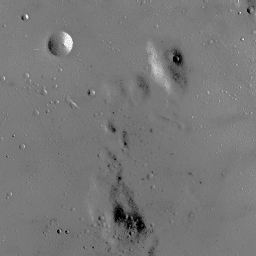

In [ ]:
#original image
image = Image.open("/content/moon.bmp")
image

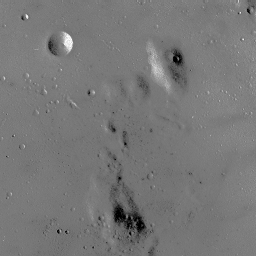

In [ ]:
#gray scale image
img_gray = image.convert('L')
img_gray

In [ ]:
#create an array
img_array = np.asarray(img_gray)

In [ ]:
#first, flatten the image array and calculate the histogram
def cal_histogram(img_array):
  vars = img_array.flatten()
  histogram_array = np.zeros(256, dtype=int)
  for idx in range(vars.size):
    histogram_array[vars[idx]] += 1
  return histogram_array

#define the func
histogram_array = cal_histogram(img_array)

In [ ]:
#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

In [ ]:
#get the cumulative histogram array
cumsum_hist_array = np.cumsum(histogram_array)

Text(0, 0.5, 'Distribution')

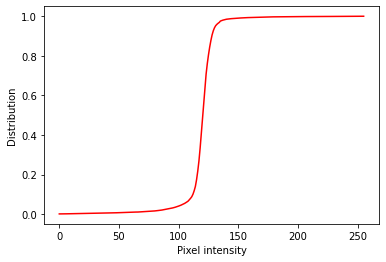

In [ ]:
#plot the original intensity level
plt.figure()
plt.plot(cumsum_hist_array, color = 'r')
plt.xlabel('Pixel intensity')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

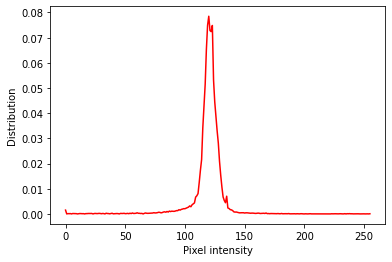

In [ ]:
#original distribution
plt.figure()
plt.plot(histogram_array, color = 'r')
plt.xlabel('Pixel intensity')
plt.ylabel('Distribution')

In [ ]:
#create a mapping
mapping = np.floor(255 * cumsum_hist_array).astype(np.uint8)

In [ ]:
#map it
equal_img_list = [mapping[p] for p in list(img_array.flatten())]

In [ ]:
#reshape and then write back into img_array
equal_img_array = np.reshape(np.asarray(equal_img_list), img_array.shape)

In [ ]:
#calculate histogram and cumulative histogram for the equalized image
equal_histogram_array = np.bincount(equal_img_array.flatten(), minlength=256)
num_pixels = np.sum(equal_histogram_array)
equal_dist = equal_histogram_array/num_pixels

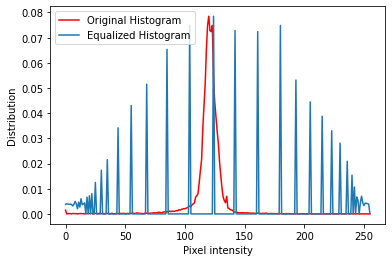

In [ ]:
#plot
plt.figure()
plt.plot(histogram_array, color = 'r')
plt.plot(equal_dist)
plt.xlabel('Pixel intensity')
plt.ylabel('Distribution')
plt.legend(['Original Histogram','Equalized Histogram'])

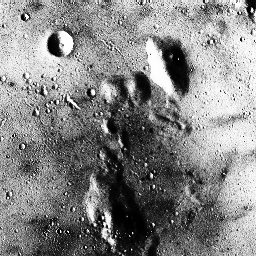

In [ ]:
#equalized image
equal_img = Image.fromarray(equal_img_array, mode='L')
equal_img